In [89]:
import os
import glob

import numpy as np
import matplotlib.pyplot as plt

import openfoamparser as ofpp

In [90]:
dumpfolder = dumpfolder
expfolders = ["vortexMerge_icoFoam", "vortexMerge_vortiFoam"]
fields = ["U", "p", "omega", "psi"]
imshape = 256, 256
timelabels = [f"{t:g}" for t in np.arange(0.5, 40.1, step=0.5)]
timeticks = [float(t) for t in timelabels]

np.save(os.path.join(dumpfolder, "data_timeticks"), timeticks)

all_data = {}
for expfolder in expfolders:
    all_data[expfolder] = {}

In [91]:
def base_plot(xs, ys, title, xlabel, ylabel, fname=None):
    plt.rcParams['text.usetex'] = False    

    plt.plot(xs, ys)

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    plt.grid(axis="y")

    if fname:
        plt.savefig(fname)

    plt.show()
    plt.close()

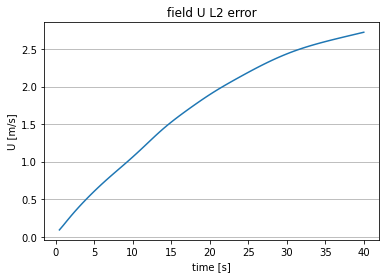

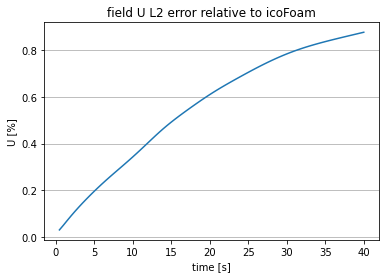

In [92]:
field = "U"
for expfolder in expfolders:
    fields = []
    for timestamp in timelabels:
        fdata, meta = ofpp.parse_field_all(os.path.join(expfolder, timestamp, field))

        if len(fdata.shape) > 1:
            showdata = fdata.reshape((*imshape, fdata.shape[-1]))
        else:
            tmpshape = (*imshape, fdata.shape[-1])
            showdata = np.full(tmpshape, fdata)

        fields.append(showdata)

    all_data[expfolder][field] = np.array(fields)

np.save(os.path.join(dumpfolder, f"data_{field}_icoFoam"), all_data["vortexMerge_icoFoam"][field])
np.save(os.path.join(dumpfolder, f"data_{field}_vortiFoam"), all_data["vortexMerge_vortiFoam"][field])

diff = all_data["vortexMerge_icoFoam"][field] - all_data["vortexMerge_vortiFoam"][field]
diff = diff.reshape(len(timeticks), -1)
diff_norm = np.linalg.norm(diff, axis=-1)

base_plot(timeticks, diff_norm, 
          title=f"field {field} L2 error", 
          xlabel="time [s]", 
          ylabel=f"{field} [m/s]",
          fname=os.path.join(dumpfolder, f"evolution_{field}_diff_norm.png")
          )

refs_norms = np.linalg.norm(all_data["vortexMerge_icoFoam"][field].reshape(len(timeticks), -1))
diff_refs = diff_norm / refs_norms

base_plot(timeticks, 100 * diff_refs, 
          title=f"field {field} L2 error relative to icoFoam", 
          xlabel="time [s]", 
          ylabel=f"{field} [%]",
          fname=os.path.join(dumpfolder, f"evolution_{field}_diff_ref_norm.png")
          )

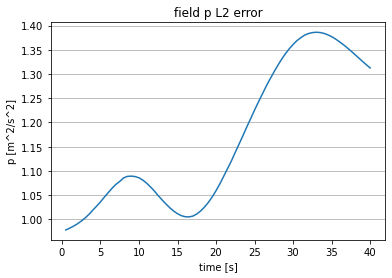

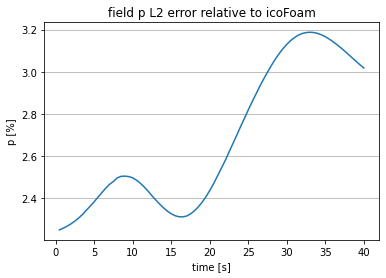

In [93]:
field = "p"
for expfolder in expfolders:
    fields = []
    for timestamp in timelabels:
        fdata, meta = ofpp.parse_field_all(os.path.join(expfolder, timestamp, field))

        try:
            showdata = fdata.reshape(imshape)
        except AttributeError:
            showdata = np.full(imshape, fdata)

        fields.append(showdata)

    all_data[expfolder][field] = np.array(fields)

np.save(os.path.join(dumpfolder, f"data_{field}_icoFoam"), all_data["vortexMerge_icoFoam"][field])
np.save(os.path.join(dumpfolder, f"data_{field}_vortiFoam"), all_data["vortexMerge_vortiFoam"][field])

diff = all_data["vortexMerge_icoFoam"][field] - all_data["vortexMerge_vortiFoam"][field]
diff = diff.reshape(len(timeticks), -1)
diff_norm = np.linalg.norm(diff, axis=-1)

base_plot(timeticks, diff_norm, 
          title=f"field {field} L2 error", 
          xlabel="time [s]", 
          ylabel=f"{field} [m^2/s^2]",
          fname=os.path.join(dumpfolder, f"evolution_{field}_diff_norm.png")
          )

refs_norms = np.linalg.norm(all_data["vortexMerge_icoFoam"][field].reshape(len(timeticks), -1))
diff_refs = diff_norm / refs_norms

base_plot(timeticks, 100 * diff_refs, 
          title=f"field {field} L2 error relative to icoFoam", 
          xlabel="time [s]", 
          ylabel=f"{field} [%]",
          fname=os.path.join(dumpfolder, f"evolution_{field}_diff_ref_norm.png")
          )

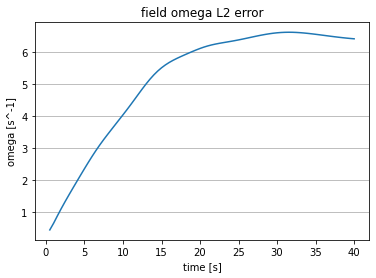

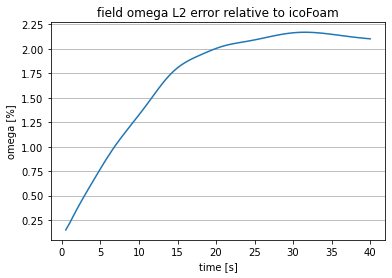

In [94]:
field = "omega"

expfolder = "vortexMerge_vortiFoam"
fields = []
for timestamp in timelabels:
    fdata, meta = ofpp.parse_field_all(os.path.join(expfolder, timestamp, field))

    try:
        showdata = fdata.reshape(imshape)
    except AttributeError:
        showdata = np.full(imshape, fdata)

    fields.append(showdata)

all_data[expfolder][field] = fields

expfolder = "vortexMerge_icoFoam"
fields = []
for timestamp in timelabels:
    fdata, meta = ofpp.parse_field_all(os.path.join(expfolder, timestamp, "omegaVector"))

    if len(fdata.shape) > 1:
        showdata = fdata[:, -1].reshape(imshape)
    else:
        showdata = fdata.reshape(imshape)

    fields.append(showdata)

all_data[expfolder][field] = np.array(fields)

np.save(os.path.join(dumpfolder, f"data_{field}_icoFoam"), all_data["vortexMerge_icoFoam"][field])
np.save(os.path.join(dumpfolder, f"data_{field}_vortiFoam"), all_data["vortexMerge_vortiFoam"][field])

diff = all_data["vortexMerge_icoFoam"][field] - all_data["vortexMerge_vortiFoam"][field]
diff = diff.reshape(len(timeticks), -1)
diff_norm = np.linalg.norm(diff, axis=-1)

base_plot(timeticks, diff_norm, 
          title=f"field {field} L2 error", 
          xlabel="time [s]", 
          ylabel=f"{field} [s^-1]",
          fname=os.path.join(dumpfolder, f"evolution_{field}_diff_norm.png")
          )

refs_norms = np.linalg.norm(all_data["vortexMerge_icoFoam"][field].reshape(len(timeticks), -1))
diff_refs = diff_norm / refs_norms

base_plot(timeticks, 100 * diff_refs, 
          title=f"field {field} L2 error relative to icoFoam", 
          xlabel="time [s]", 
          ylabel=f"{field} [%]",
          fname=os.path.join(dumpfolder, f"evolution_{field}_diff_ref_norm.png")
          )

['ico_vorti_comparison/ico_psi_cell_00.csv', 'ico_vorti_comparison/ico_psi_cell_01.csv', 'ico_vorti_comparison/ico_psi_cell_02.csv', 'ico_vorti_comparison/ico_psi_cell_03.csv', 'ico_vorti_comparison/ico_psi_cell_04.csv', 'ico_vorti_comparison/ico_psi_cell_05.csv', 'ico_vorti_comparison/ico_psi_cell_06.csv', 'ico_vorti_comparison/ico_psi_cell_07.csv', 'ico_vorti_comparison/ico_psi_cell_08.csv', 'ico_vorti_comparison/ico_psi_cell_09.csv', 'ico_vorti_comparison/ico_psi_cell_10.csv', 'ico_vorti_comparison/ico_psi_cell_11.csv', 'ico_vorti_comparison/ico_psi_cell_12.csv', 'ico_vorti_comparison/ico_psi_cell_13.csv', 'ico_vorti_comparison/ico_psi_cell_14.csv', 'ico_vorti_comparison/ico_psi_cell_15.csv', 'ico_vorti_comparison/ico_psi_cell_16.csv', 'ico_vorti_comparison/ico_psi_cell_17.csv', 'ico_vorti_comparison/ico_psi_cell_18.csv', 'ico_vorti_comparison/ico_psi_cell_19.csv', 'ico_vorti_comparison/ico_psi_cell_20.csv', 'ico_vorti_comparison/ico_psi_cell_21.csv', 'ico_vorti_comparison/ico_psi_c

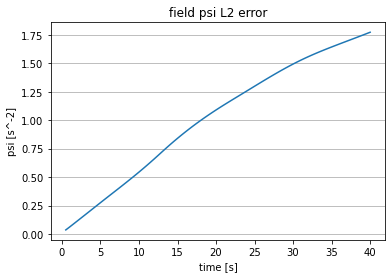

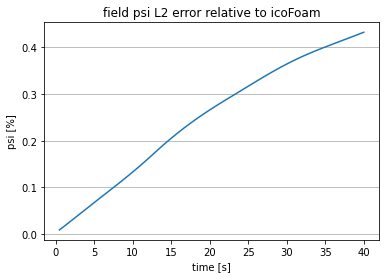

In [95]:
field = "psi"

expfolder = "vortexMerge_vortiFoam"
fields = []
for timestamp in timelabels:
    fdata, meta = ofpp.parse_field_all(os.path.join(expfolder, timestamp, field))
    
    try:
        showdata = fdata.reshape(imshape)
    except AttributeError:
        showdata = np.full(imshape, fdata)

    fields.append(showdata)

all_data[expfolder][field] = np.array(fields)

expfolder = "vortexMerge_icoFoam"
fields = []
fnames = sorted(glob.glob(os.path.join(dumpfolder, "ico_psi_cell_*.csv")))
for fname in fnames:
    fdata = np.loadtxt(fname, delimiter=",", skiprows=1, usecols=[1])

    showdata = fdata.reshape(imshape)

    fields.append(showdata)

all_data[expfolder][field] = np.array(fields)

np.save(os.path.join(dumpfolder, f"data_{field}_icoFoam"), all_data["vortexMerge_icoFoam"][field])
np.save(os.path.join(dumpfolder, f"data_{field}_vortiFoam"), all_data["vortexMerge_vortiFoam"][field])

diff = all_data["vortexMerge_icoFoam"][field] - all_data["vortexMerge_vortiFoam"][field]
diff = diff.reshape(len(timeticks), -1)
diff_norm = np.linalg.norm(diff, axis=-1)

base_plot(timeticks, diff_norm, 
          title=f"field {field} L2 error", 
          xlabel="time [s]", 
          ylabel=f"{field} [s^-2]",
          fname=os.path.join(dumpfolder, f"evolution_{field}_diff_norm.png")
          )

refs_norms = np.linalg.norm(all_data["vortexMerge_icoFoam"][field].reshape(len(timeticks), -1))
diff_refs = diff_norm / refs_norms

base_plot(timeticks, 100 * diff_refs, 
          title=f"field {field} L2 error relative to icoFoam", 
          xlabel="time [s]", 
          ylabel=f"{field} [%]",
          fname=os.path.join(dumpfolder, f"evolution_{field}_diff_ref_norm.png")
          )